In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from projects.data_quality_validation.data_quality_checks import DataQualityChecks
from projects.data_quality_validation.schema_definition import WINE_QUALITY_TYPE_SCHEMA
from projects.data_quality_validation.schema_validation import SchemaValidation

In [2]:
dq = DataQualityChecks("./../datasets/wine_quality_corrupted.csv")
df = dq.get_dataframe()
schema_validation = SchemaValidation(df)

print("Dataset Preview:")
df.head()

Dataset loaded successfully.
Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4.0


In [3]:
# Validate schema
# Check for column names
column_check = schema_validation.check_column_names(schema=WINE_QUALITY_TYPE_SCHEMA)
print("Column Name Check Results:", column_check)

# Check for data type mismatches
type_check = schema_validation.check_data_types(schema=WINE_QUALITY_TYPE_SCHEMA)
print("Data Type Check Results:", type_check)

Column Name Check Results: {'missing_columns': [], 'extra_columns': []}
Data Type Check Results: {}


In [4]:
print("Null Values Count:")
print(dq.check_null_values())
print(f"Duplicate Rows: {dq.check_duplicates()}")
print("Outliers based on Z-score:")
print(dq.check_outliers_zscore())
print("Outliers based on IQR:")
print(dq.check_outliers_iqr())  # Check if missing values exist

Null Values Count:
alcohol    52
quality     5
Id          5
dtype: int64
Duplicate Rows: 10
Outliers based on Z-score:
123
Outliers based on IQR:
fixed acidity            744.400000
volatile acidity          16.825000
citric acid                1.000000
residual sugar           681.950000
chlorides                 15.536000
free sulfur dioxide     1023.000000
total sulfur dioxide    5740.000000
density                   39.955990
pH                        68.650000
sulphates                 52.960000
alcohol                  183.866667
quality                  146.000000
dtype: float64


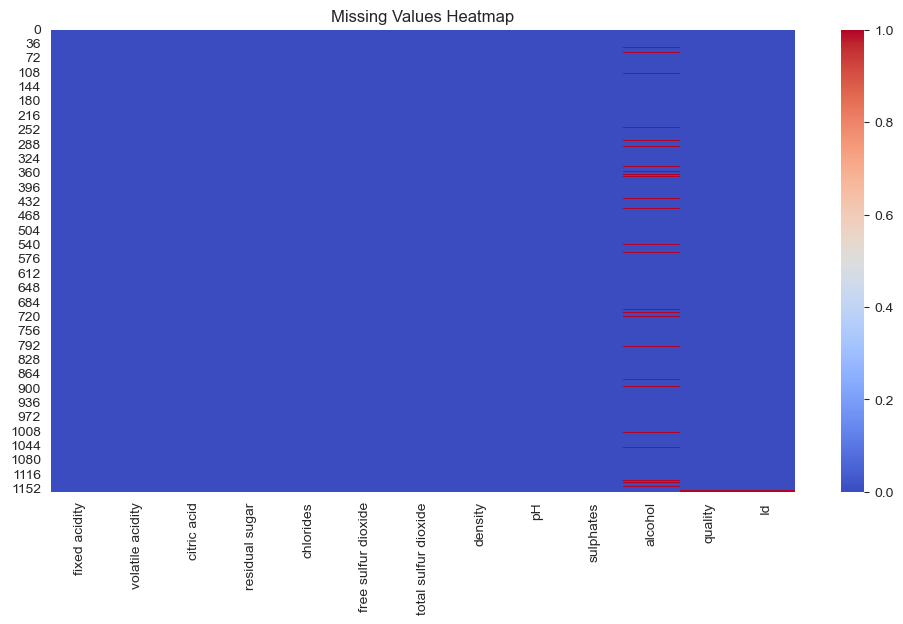

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm').set_title('Missing Values Heatmap')
plt.show()

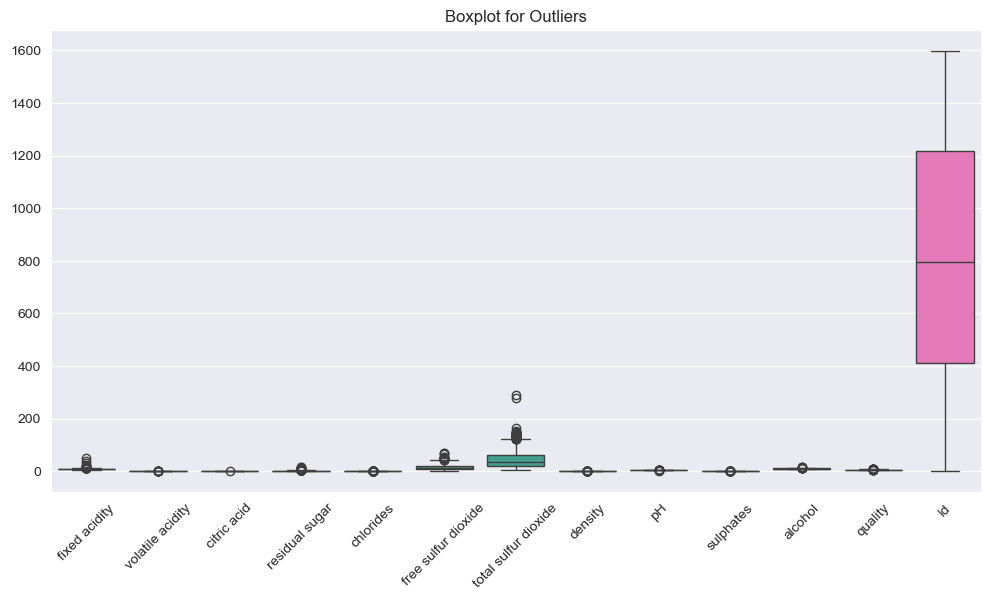

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number])).set_title('Boxplot for Outliers')
plt.xticks(rotation=45)
plt.show()